In [1]:
import pandas as pd
import warnings
import ast
import re
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('recipe.csv')
df1=df.copy()
df.head()

,recipe_id,recipe_name,aver_rate,image_url,review_nums,ingredients,cooking_directions,nutritions,reviews
0,222388,Homemade Bacon,5.000000,https://images.media-allrecipes.com/userphotos...,3,pork belly^smoked paprika^kosher salt^ground b...,{'directions': u'Prep\n5 m\nCook\n2 h 45 m\nRe...,"{u'niacin': {u'hasCompleteData': False, u'name...","{8542392: {'rating': 5, 'followersCount': 11, ..."
1,240488,"Pork Loin, Apples, and Sauerkraut",4.764706,https://images.media-allrecipes.com/userphotos...,29,sauerkraut drained^Granny Smith apples sliced^...,{'directions': u'Prep\n15 m\nCook\n2 h 30 m\nR...,"{u'niacin': {u'hasCompleteData': False, u'name...","{3574785: {'rating': 5, 'followersCount': 0, '..."
2,218939,Foolproof Rosemary Chicken Wings,4.571429,https://images.media-allrecipes.com/userphotos...,12,chicken wings^sprigs rosemary^head garlic^oliv...,"{'directions': u""Prep\n20 m\nCook\n40 m\nReady...","{u'niacin': {u'hasCompleteData': True, u'name'...","{13774946: {'rating': 5, 'followersCount': 0, ..."
3,87211,Chicken Pesto Paninis,4.625000,https://images.media-allrecipes.com/userphotos...,163,focaccia bread quartered^prepared basil pesto^...,{'directions': u'Prep\n15 m\nCook\n5 m\nReady ...,"{u'niacin': {u'hasCompleteData': True, u'name'...","{1563136: {'rating': 5, 'followersCount': 0, '..."
4,245714,Potato Bacon Pizza,4.500000,https://images.media-allrecipes.com/userphotos...,2,red potatoes^strips bacon^Sauce:^heavy whippin...,{'directions': u'Prep\n20 m\nCook\n45 m\nReady...,"{u'niacin': {u'hasCompleteData': True, u'name'...","{2945555: {'rating': 5, 'followersCount': 6690..."


### Converting the nutrition from object datatype to dictionary:

In [3]:
for i in range(len(df)):
    df['nutritions'][i]=ast.literal_eval(df['nutritions'][i])

### Extracting the keys in the dictinary to create a dataframe:

In [4]:
columns=list((df['nutritions'][0]).keys())
print(columns)

['niacin', 'sugars', 'sodium', 'carbohydrates', 'vitaminB6', 'calories', 'thiamin', 'fat', 'folate', 'caloriesFromFat', 'calcium', 'fiber', 'magnesium', 'iron', 'cholesterol', 'protein', 'vitaminA', 'potassium', 'saturatedFat', 'vitaminC']


### extracting the percentage value of the nutritions:

In [5]:
data=[]
for i in range(len(df)):
    values=[]
    for key,value in df['nutritions'][i].items():
        if(value['percentDailyValue']!= None) and(value['percentDailyValue']!='-'):
            x=re.sub('<','',str(value['percentDailyValue']))
            values.append(x)
        else:
            values.append(0)
    data.append(values)

### Creating a dataframe using the extracted data:

In [6]:
nutritions=pd.DataFrame(data,columns=columns).drop(['caloriesFromFat','sugars'],axis=1)
nutritions.index=df['recipe_id']
nutritions

,niacin,sodium,carbohydrates,vitaminB6,calories,thiamin,fat,folate,calcium,fiber,magnesium,iron,cholesterol,protein,vitaminA,potassium,saturatedFat,vitaminC
recipe_id,,,,,,,,,,,,,,,,,,
222388,72,81,1,15,15,39,36,1,1,2,8,12,21,42,9,10,39,1
240488,120,104,10,83,19,84,18,47,17,41,29,66,33,73,1,31,18,88
218939,77,31,2,35,17,6,36,4,8,4,9,17,24,48,7,7,28,9
87211,102,43,20,17,32,3,45,130,66,18,23,50,20,65,12,10,55,30
245714,23,8,5,3,8,17,12,27,17,3,4,10,7,14,3,3,20,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222886,1,1,6,1,20,1,1,0,1,0,1,1,0,1,0,1,1,0
25650,3,3,1,7,6,1,14,3,3,1,1,4,13,4,1,2,27,1
23544,7,3,10,10,8,3,7,5,7,8,4,7,3,10,2,8,8,19


### converting the datatype of the datframe from object to int:

In [7]:
nutritions = nutritions.apply(pd.to_numeric)
nutritions.dtypes

niacin           int64
sodium           int64
carbohydrates    int64
vitaminB6        int64
calories         int64
thiamin          int64
fat              int64
folate           int64
calcium          int64
fiber            int64
magnesium        int64
iron             int64
cholesterol      int64
protein          int64
vitaminA         int64
potassium        int64
saturatedFat     int64
vitaminC         int64
dtype: object

### Normalising the dataframe:

In [8]:
nutritions_normalised=(nutritions - nutritions.min()) / (nutritions.max() - nutritions.min())
nutritions_normalised

,niacin,sodium,carbohydrates,vitaminB6,calories,thiamin,fat,folate,calcium,fiber,magnesium,iron,cholesterol,protein,vitaminA,potassium,saturatedFat,vitaminC
recipe_id,,,,,,,,,,,,,,,,,,
222388,0.048355,0.015326,0.002114,0.017878,0.032823,0.029680,0.060914,0.001241,0.003460,0.004640,0.003797,0.004167,0.021717,0.067742,0.004083,0.058824,0.075435,0.000907
240488,0.080591,0.019678,0.021142,0.098927,0.041575,0.063927,0.030457,0.058313,0.058824,0.095128,0.013764,0.022917,0.034126,0.117742,0.000454,0.182353,0.034816,0.079782
218939,0.051713,0.005866,0.004228,0.041716,0.037199,0.004566,0.060914,0.004963,0.027682,0.009281,0.004271,0.005903,0.024819,0.077419,0.003176,0.041176,0.054159,0.008160
87211,0.068502,0.008136,0.042283,0.020262,0.070022,0.002283,0.076142,0.161290,0.228374,0.041763,0.010916,0.017361,0.020683,0.104839,0.005445,0.058824,0.106383,0.027199
245714,0.015447,0.001514,0.010571,0.003576,0.017505,0.012938,0.020305,0.033499,0.058824,0.006961,0.001898,0.003472,0.007239,0.022581,0.001361,0.017647,0.038685,0.001813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222886,0.000672,0.000189,0.012685,0.001192,0.043764,0.000761,0.001692,0.000000,0.003460,0.000000,0.000475,0.000347,0.000000,0.001613,0.000000,0.005882,0.001934,0.000000
25650,0.002015,0.000568,0.002114,0.008343,0.013129,0.000761,0.023689,0.003722,0.010381,0.002320,0.000475,0.001389,0.013444,0.006452,0.000454,0.011765,0.052224,0.000907
23544,0.004701,0.000568,0.021142,0.011919,0.017505,0.002283,0.011844,0.006203,0.024221,0.018561,0.001898,0.002431,0.003102,0.016129,0.000907,0.047059,0.015474,0.017226


### Showing all the recipe_id available:

In [9]:
print("The number of recipies available: ",len(nutritions_normalised.index))
print('\n')
print(list(nutritions_normalised.index)[:100])

The number of recipies available:  49698


[222388, 240488, 218939, 87211, 245714, 218545, 20453, 244856, 22402, 258163, 23658, 244786, 260453, 103305, 261609, 46139, 26668, 185816, 79814, 25507, 238886, 235633, 50908, 73910, 236920, 235757, 8778, 217969, 233910, 231459, 233874, 133604, 55420, 231825, 142456, 140407, 26623, 22681, 99892, 219884, 25930, 241535, 239547, 244979, 219754, 20900, 242492, 125366, 23613, 63351, 16246, 152220, 212912, 213650, 17178, 130444, 231412, 233443, 8987, 191159, 229331, 53650, 214631, 8657, 216704, 236517, 8733, 115703, 214755, 215053, 9035, 237375, 31870, 12414, 216090, 230314, 57002, 213268, 230270, 28011, 245367, 238325, 219208, 85757, 20020, 262071, 23187, 143234, 143350, 25174, 156795, 17813, 76164, 14664, 217281, 231105, 233030, 14700, 172958, 34513]


### Visualising the chosen recipie:

enter the chosen recipie id: 222388


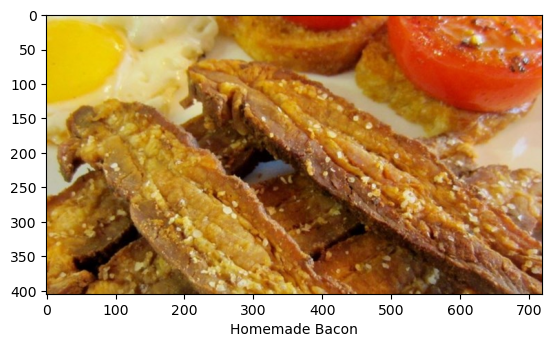

In [10]:
df1.index=df1['recipe_id']
cid=input("enter the chosen recipie id: ")
path='images'+'/'+'{}.jpg'.format(cid)
img = image.load_img(path)
img=image.img_to_array(img, dtype='int')
fig, ax = plt.subplots(1,1)
plt.xlabel(df1.loc[int(cid)]['recipe_name'])
ax.imshow(img)

In [20]:
chosen_recipie=list(nutritions_normalised.loc[int(cid)].values)
print(chosen_recipie)

[0.048354600402955, 0.01532639545884579, 0.0021141649048625794, 0.017878426698450536, 0.03282275711159737, 0.02968036529680365, 0.06091370558375635, 0.0012406947890818859, 0.0034602076124567475, 0.004640371229698376, 0.0037968675842429997, 0.004166666666666667, 0.02171664943123061, 0.06774193548387097, 0.004083484573502722, 0.058823529411764705, 0.07543520309477757, 0.0009066183136899365]


In [21]:
other_recipies=nutritions_normalised.drop([int(cid)])
other_recipies

,niacin,sodium,carbohydrates,vitaminB6,calories,thiamin,fat,folate,calcium,fiber,magnesium,iron,cholesterol,protein,vitaminA,potassium,saturatedFat,vitaminC
recipe_id,,,,,,,,,,,,,,,,,,
240488,0.080591,0.019678,0.021142,0.098927,0.041575,0.063927,0.030457,0.058313,0.058824,0.095128,0.013764,0.022917,0.034126,0.117742,0.000454,0.182353,0.034816,0.079782
218939,0.051713,0.005866,0.004228,0.041716,0.037199,0.004566,0.060914,0.004963,0.027682,0.009281,0.004271,0.005903,0.024819,0.077419,0.003176,0.041176,0.054159,0.008160
87211,0.068502,0.008136,0.042283,0.020262,0.070022,0.002283,0.076142,0.161290,0.228374,0.041763,0.010916,0.017361,0.020683,0.104839,0.005445,0.058824,0.106383,0.027199
245714,0.015447,0.001514,0.010571,0.003576,0.017505,0.012938,0.020305,0.033499,0.058824,0.006961,0.001898,0.003472,0.007239,0.022581,0.001361,0.017647,0.038685,0.001813
218545,0.053727,0.009839,0.025370,0.021454,0.037199,0.012177,0.020305,0.055831,0.048443,0.074246,0.009018,0.021875,0.021717,0.083871,0.014519,0.111765,0.036750,0.020852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222886,0.000672,0.000189,0.012685,0.001192,0.043764,0.000761,0.001692,0.000000,0.003460,0.000000,0.000475,0.000347,0.000000,0.001613,0.000000,0.005882,0.001934,0.000000
25650,0.002015,0.000568,0.002114,0.008343,0.013129,0.000761,0.023689,0.003722,0.010381,0.002320,0.000475,0.001389,0.013444,0.006452,0.000454,0.011765,0.052224,0.000907
23544,0.004701,0.000568,0.021142,0.011919,0.017505,0.002283,0.011844,0.006203,0.024221,0.018561,0.001898,0.002431,0.003102,0.016129,0.000907,0.047059,0.015474,0.017226


### Computing the cosine similarity between the chosen recipie and the other recipies:

In [22]:
cosine_sim=[]
for i in other_recipies.index:
    x=list(other_recipies.loc[i].values)
    cosine_similarity = np.dot(x,chosen_recipie) / (np.linalg.norm(x) * np.linalg.norm(chosen_recipie))
    cosine_sim.append(cosine_similarity)
other_recipies['cosine_similarity']=cosine_sim
other_recipies

,niacin,sodium,carbohydrates,vitaminB6,calories,thiamin,fat,folate,calcium,fiber,magnesium,iron,cholesterol,protein,vitaminA,potassium,saturatedFat,vitaminC,cosine_similarity
recipe_id,,,,,,,,,,,,,,,,,,,
240488,0.080591,0.019678,0.021142,0.098927,0.041575,0.063927,0.030457,0.058313,0.058824,0.095128,0.013764,0.022917,0.034126,0.117742,0.000454,0.182353,0.034816,0.079782,0.727424
218939,0.051713,0.005866,0.004228,0.041716,0.037199,0.004566,0.060914,0.004963,0.027682,0.009281,0.004271,0.005903,0.024819,0.077419,0.003176,0.041176,0.054159,0.008160,0.936040
87211,0.068502,0.008136,0.042283,0.020262,0.070022,0.002283,0.076142,0.161290,0.228374,0.041763,0.010916,0.017361,0.020683,0.104839,0.005445,0.058824,0.106383,0.027199,0.585116
245714,0.015447,0.001514,0.010571,0.003576,0.017505,0.012938,0.020305,0.033499,0.058824,0.006961,0.001898,0.003472,0.007239,0.022581,0.001361,0.017647,0.038685,0.001813,0.654495
218545,0.053727,0.009839,0.025370,0.021454,0.037199,0.012177,0.020305,0.055831,0.048443,0.074246,0.009018,0.021875,0.021717,0.083871,0.014519,0.111765,0.036750,0.020852,0.741179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222886,0.000672,0.000189,0.012685,0.001192,0.043764,0.000761,0.001692,0.000000,0.003460,0.000000,0.000475,0.000347,0.000000,0.001613,0.000000,0.005882,0.001934,0.000000,0.323792
25650,0.002015,0.000568,0.002114,0.008343,0.013129,0.000761,0.023689,0.003722,0.010381,0.002320,0.000475,0.001389,0.013444,0.006452,0.000454,0.011765,0.052224,0.000907,0.789451
23544,0.004701,0.000568,0.021142,0.011919,0.017505,0.002283,0.011844,0.006203,0.024221,0.018561,0.001898,0.002431,0.003102,0.016129,0.000907,0.047059,0.015474,0.017226,0.666139


### Sorting the dataframe using cosine similarity:

In [23]:
cosine_sim_df=other_recipies.sort_values(by='cosine_similarity',ascending=False)
cosine_sim_df=cosine_sim_df[['cosine_similarity','niacin', 'sodium', 'carbohydrates', 'vitaminB6', 'calories', 'thiamin','fat', 'folate', 'calcium', 'fiber', 'magnesium', 'iron', 'cholesterol','protein', 'vitaminA', 'potassium', 'saturatedFat', 'vitaminC']]
cosine_sim_df

,cosine_similarity,niacin,sodium,carbohydrates,vitaminB6,calories,thiamin,fat,folate,calcium,fiber,magnesium,iron,cholesterol,protein,vitaminA,potassium,saturatedFat,vitaminC
recipe_id,,,,,,,,,,,,,,,,,,,
158727,0.997600,0.031565,0.006623,0.002114,0.009535,0.021882,0.019787,0.040609,0.001241,0.00346,0.00000,0.001898,0.001736,0.014478,0.045161,0.000454,0.035294,0.050290,0.000000
257428,0.997040,0.047683,0.013623,0.008457,0.016687,0.039387,0.029680,0.060914,0.002481,0.00692,0.00464,0.003322,0.004167,0.021717,0.067742,0.001361,0.058824,0.075435,0.006346
232675,0.996985,0.020819,0.004352,0.002114,0.005959,0.015317,0.012938,0.027073,0.001241,0.00346,0.00000,0.001424,0.001389,0.009307,0.029032,0.000454,0.023529,0.032882,0.000000
242318,0.994305,0.033580,0.007947,0.004228,0.015495,0.028446,0.028919,0.047377,0.001241,0.00346,0.00232,0.002373,0.002431,0.015512,0.050000,0.000454,0.041176,0.059961,0.006346
158764,0.994121,0.015447,0.004730,0.002114,0.004768,0.013129,0.009893,0.023689,0.001241,0.00346,0.00232,0.001424,0.001389,0.007239,0.022581,0.000454,0.017647,0.025145,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60823,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
73069,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
20213,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### choosing the top 6 recipies and visualising it:

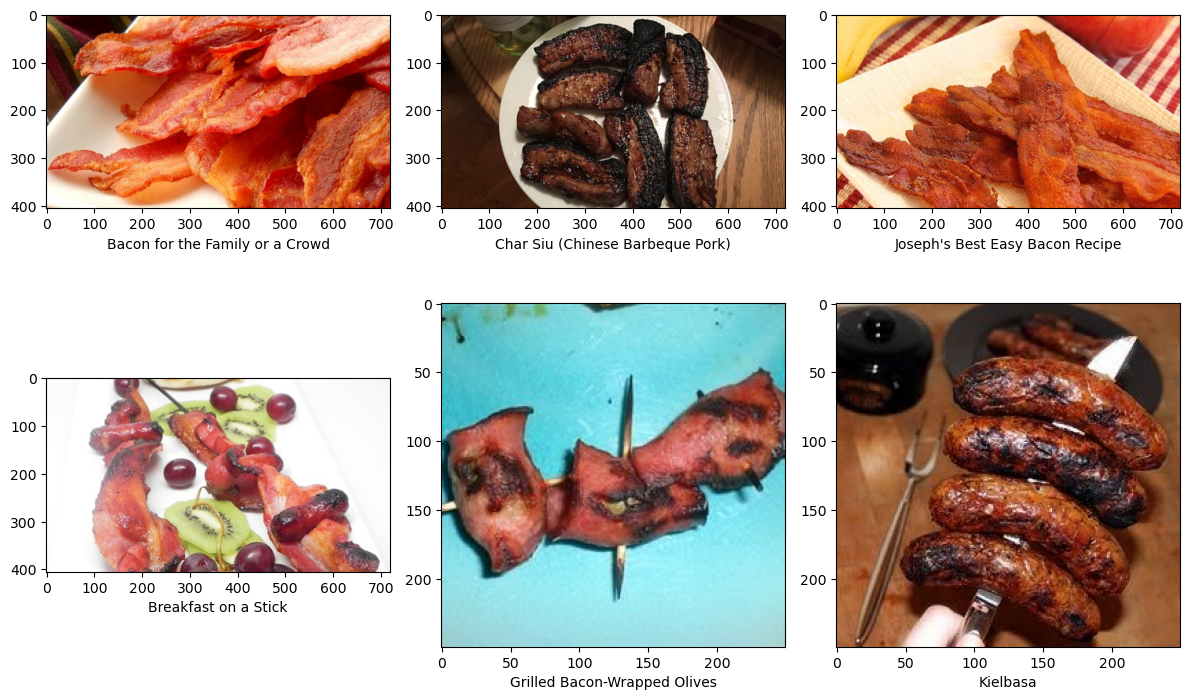

In [24]:
top_6=list(cosine_sim_df[:6].index)
fig, axes = plt.subplots(2, 3,figsize=(12, 8))
for i in range(len(top_6)):
    path='images'+'/'+'{}.jpg'.format(top_6[i])
    img = image.load_img(path)
    img=image.img_to_array(img, dtype='int')
    ax = axes[i // 3, i % 3]
    ax.imshow(img)
    ax.set_xlabel(df1.loc[top_6[i]]['recipe_name'])
plt.tight_layout()
plt.show()

### Computing the eucildean distance between the chosen recipie and the other recipies:

In [25]:
euclid_dist=[]
for i in other_recipies.index:
    x=list(other_recipies.loc[i].values[:18])
    euclidean_distance = np.linalg.norm(np.array(x) - np.array(chosen_recipie))
    euclid_dist.append(euclidean_distance)
other_recipies['euclidean_distance']=euclid_dist
other_recipies

,niacin,sodium,carbohydrates,vitaminB6,calories,thiamin,fat,folate,calcium,fiber,magnesium,iron,cholesterol,protein,vitaminA,potassium,saturatedFat,vitaminC,cosine_similarity,euclidean_distance
recipe_id,,,,,,,,,,,,,,,,,,,,
240488,0.080591,0.019678,0.021142,0.098927,0.041575,0.063927,0.030457,0.058313,0.058824,0.095128,0.013764,0.022917,0.034126,0.117742,0.000454,0.182353,0.034816,0.079782,0.727424,0.225666
218939,0.051713,0.005866,0.004228,0.041716,0.037199,0.004566,0.060914,0.004963,0.027682,0.009281,0.004271,0.005903,0.024819,0.077419,0.003176,0.041176,0.054159,0.008160,0.936040,0.053568
87211,0.068502,0.008136,0.042283,0.020262,0.070022,0.002283,0.076142,0.161290,0.228374,0.041763,0.010916,0.017361,0.020683,0.104839,0.005445,0.058824,0.106383,0.027199,0.585116,0.292021
245714,0.015447,0.001514,0.010571,0.003576,0.017505,0.012938,0.020305,0.033499,0.058824,0.006961,0.001898,0.003472,0.007239,0.022581,0.001361,0.017647,0.038685,0.001813,0.654495,0.114597
218545,0.053727,0.009839,0.025370,0.021454,0.037199,0.012177,0.020305,0.055831,0.048443,0.074246,0.009018,0.021875,0.021717,0.083871,0.014519,0.111765,0.036750,0.020852,0.741179,0.133577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222886,0.000672,0.000189,0.012685,0.001192,0.043764,0.000761,0.001692,0.000000,0.003460,0.000000,0.000475,0.000347,0.000000,0.001613,0.000000,0.005882,0.001934,0.000000,0.323792,0.143081
25650,0.002015,0.000568,0.002114,0.008343,0.013129,0.000761,0.023689,0.003722,0.010381,0.002320,0.000475,0.001389,0.013444,0.006452,0.000454,0.011765,0.052224,0.000907,0.789451,0.108331
23544,0.004701,0.000568,0.021142,0.011919,0.017505,0.002283,0.011844,0.006203,0.024221,0.018561,0.001898,0.002431,0.003102,0.016129,0.000907,0.047059,0.015474,0.017226,0.666139,0.116579


### Sorting the dataframe using euclidean distance:

In [26]:
euclid_dist_df=other_recipies.sort_values(by='euclidean_distance',ascending=False)
euclid_dist_df=euclid_dist_df[['euclidean_distance','cosine_similarity','niacin', 'sodium', 'carbohydrates', 'vitaminB6', 'calories', 'thiamin','fat', 'folate', 'calcium', 'fiber', 'magnesium', 'iron', 'cholesterol','protein', 'vitaminA', 'potassium', 'saturatedFat', 'vitaminC']]
euclid_dist_df

,euclidean_distance,cosine_similarity,niacin,sodium,carbohydrates,vitaminB6,calories,thiamin,fat,folate,calcium,fiber,magnesium,iron,cholesterol,protein,vitaminA,potassium,saturatedFat,vitaminC
recipe_id,,,,,,,,,,,,,,,,,,,,
221900,2.177284,0.919471,0.563465,0.167266,0.023256,0.445769,0.514223,0.069254,1.000000,0.074442,0.134948,0.134571,0.056004,0.145486,0.338159,0.880645,0.068058,1.000000,1.000000,0.766092
257468,1.872193,0.599464,1.000000,0.013056,0.524313,0.152563,0.000000,0.105784,0.131980,0.073201,0.391003,0.241299,0.322259,0.466667,0.951396,1.000000,0.078040,0.235294,0.075435,0.000000
239809,1.532900,0.522919,0.578240,0.067928,0.591966,0.038141,0.490153,0.598935,0.086294,0.889578,0.307958,0.252900,0.052207,0.175694,0.052740,0.490323,0.004083,0.229412,0.063830,0.005440
242381,1.430662,0.968496,0.395567,0.078524,0.112051,0.313468,0.374179,0.420852,0.622673,0.043424,0.204152,0.025522,0.039393,0.043056,0.275078,0.487097,0.043557,0.558824,0.911025,0.051677
151062,1.388723,0.253173,0.023506,0.690823,0.120507,0.069130,0.076586,0.092085,0.005076,0.411911,0.242215,0.160093,0.038918,0.034375,0.000000,0.041935,0.017241,0.494118,0.003868,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246333,0.026655,0.984921,0.044325,0.006055,0.002114,0.016687,0.035011,0.047945,0.060914,0.003722,0.010381,0.000000,0.002848,0.004861,0.029990,0.074194,0.000454,0.052941,0.069632,0.000907
239687,0.026188,0.987692,0.040967,0.004920,0.004228,0.019070,0.032823,0.034247,0.052453,0.002481,0.017301,0.002320,0.002848,0.003125,0.020683,0.067742,0.001815,0.052941,0.061896,0.000907
57775,0.025162,0.986091,0.036938,0.009082,0.002114,0.016687,0.032823,0.015221,0.057530,0.003722,0.010381,0.004640,0.003797,0.008681,0.031024,0.074194,0.004083,0.052941,0.077369,0.001813


### choosing the top 6 recipies and visualising it:

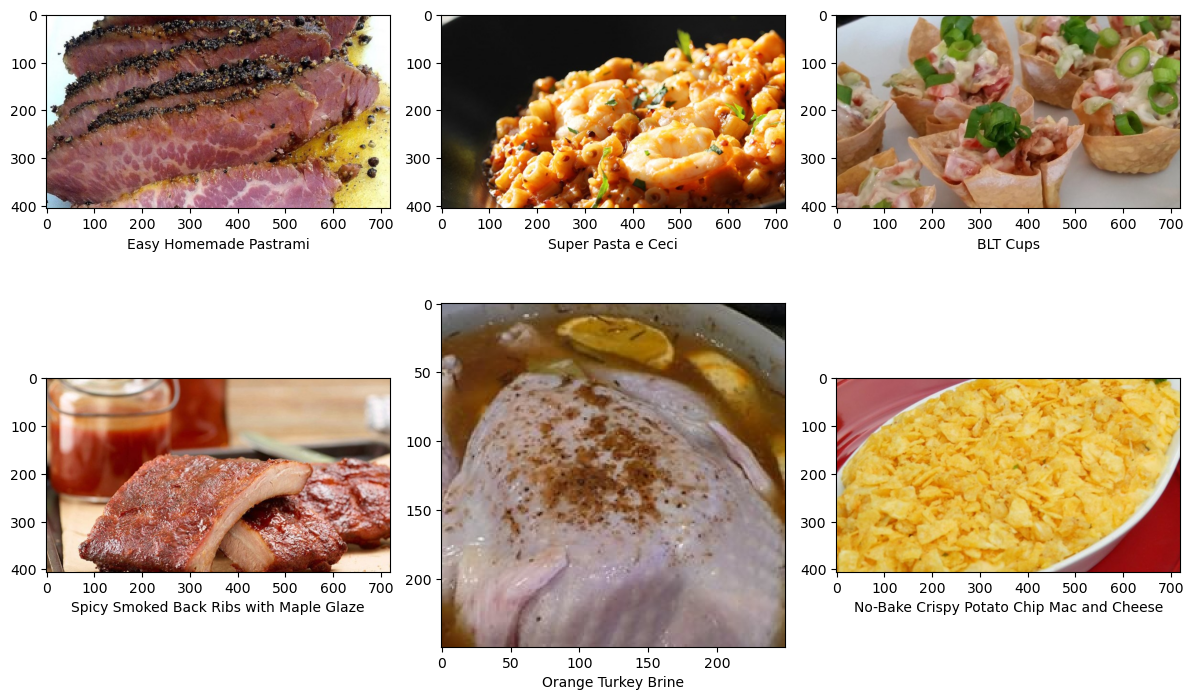

In [27]:
top_6=list(euclid_dist_df[:6].index)
fig, axes = plt.subplots(2, 3,figsize=(12, 8))
for i in range(len(top_6)):
    path='images'+'/'+'{}.jpg'.format(top_6[i])
    img = image.load_img(path)
    img=image.img_to_array(img, dtype='int')
    ax = axes[i // 3, i % 3]  # Get the correct subplot axes
    ax.imshow(img)
    ax.set_xlabel(df1.loc[top_6[i]]['recipe_name'])
plt.tight_layout()
plt.show()